In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n_sgd = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.001
)

n_momentum = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Momentum.value,
    learning_rate=0.001
)

n_adagrad = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.AdaGrad.value,
    learning_rate=0.001
)

n_adam = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

neural_networks = {"SGD": n_sgd, "Momentum": n_momentum, "AdaGrad": n_adagrad, "Adam": n_adam}

Multi Layer Network Model - ID: K7V1O1LA
Multi Layer Network Model - ID: OQRW4UUK
Multi Layer Network Model - ID: UYZSGD93
Multi Layer Network Model - ID: LMJWW73C


In [3]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)

In [4]:
batch_size = 1000
max_epoch = 10

for key, neural_network in neural_networks.items():
    print("***" + key + "***")
    neural_network.learning(
        max_epoch=max_epoch, 
        data=data, 
        batch_size=batch_size, 
        print_period=5, 
        is_numba=True, 
        verbose=False
    )
    data.reset_kfold()

***SGD***
-- Learning Started --
Epoch   0 Completed - Train Error:2.30073 - Validation Error:2.30306 - Test Accuracy:0.12890 <== Minimal Val. Error
Fold:  0
Epoch   5 Completed - Train Error:0.51256 - Validation Error:0.49680 - Test Accuracy:0.86710 <== Minimal Val. Error
Epoch  10 Completed - Train Error:0.36127 - Validation Error:0.34678 - Test Accuracy:0.90320 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 10 (Fold:  0 & Epoch: 10) - Train Error:0.36127 - Validation Error:0.34678 - Test Accuracy:0.90320

Fold:  1
Epoch   5 Completed - Train Error:0.36201 - Validation Error:0.32182 - Test Accuracy:0.91380 <== Minimal Val. Error
Epoch  10 Completed - Train Error:0.28872 - Validation Error:0.29315 - Test Accuracy:0.92390 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 20 (Fold:  1 & Epoch: 10) - Train Error:0.28872 - Validation Error:0.29315 - Test Accuracy:0.92390

Fold:  2
Epoch   

In [6]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
        key, 
        neural_network.min_validation_error_epoch,
        neural_network.min_train_error,
        neural_network.min_validation_error,
        neural_network.test_accuracy_at_min_validation_error_epoch
    ))

print()
    
for key, neural_network in neural_networks.items():    
    print("{:10s} - Mean of Min Va. Error For All Folds:{:7.5f}".format(
        key,         
        neural_network.mean_min_validation_error_for_all_folds
    ))

SGD        - Epoch:111, Min Train Error:0.10138, Min Validation Error:0.07716, Test Accuracy:0.96460
Momentum   - Epoch:111, Min Train Error:0.00206, Min Validation Error:0.00119, Test Accuracy:0.97800
AdaGrad    - Epoch:111, Min Train Error:0.04028, Min Validation Error:0.02781, Test Accuracy:0.97600
Adam       - Epoch: 61, Min Train Error:0.00372, Min Validation Error:0.00163, Test Accuracy:0.97950

SGD        - Mean of Min Va. Error For All Folds:0.18344
Momentum   - Mean of Min Va. Error For All Folds:0.03453
AdaGrad    - Mean of Min Va. Error For All Folds:0.06888
Adam       - Mean of Min Va. Error For All Folds:0.01482


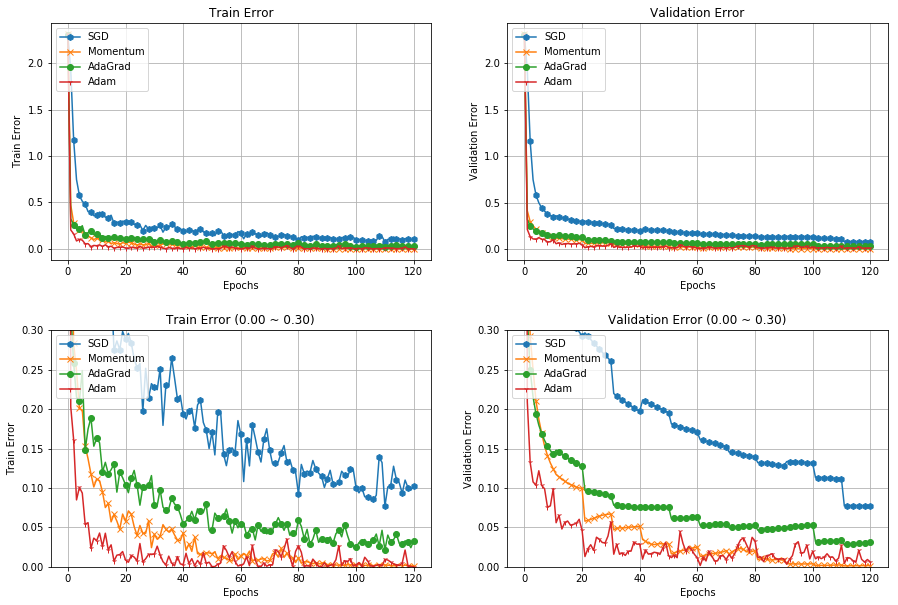

In [7]:
#markers = {"SGD": "h", "Momentum": "x", "Nesterov": "s", "AdaGrad": "o", "Adam": "1"}
markers = {"SGD": "h", "Momentum": "x", "AdaGrad": "o", "Adam": "1"}

epoch_list = np.arange(len(neural_networks["SGD"].train_error_list))

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_network.train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_network.validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_network.train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.3)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.30)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_network.validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.3)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.30)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

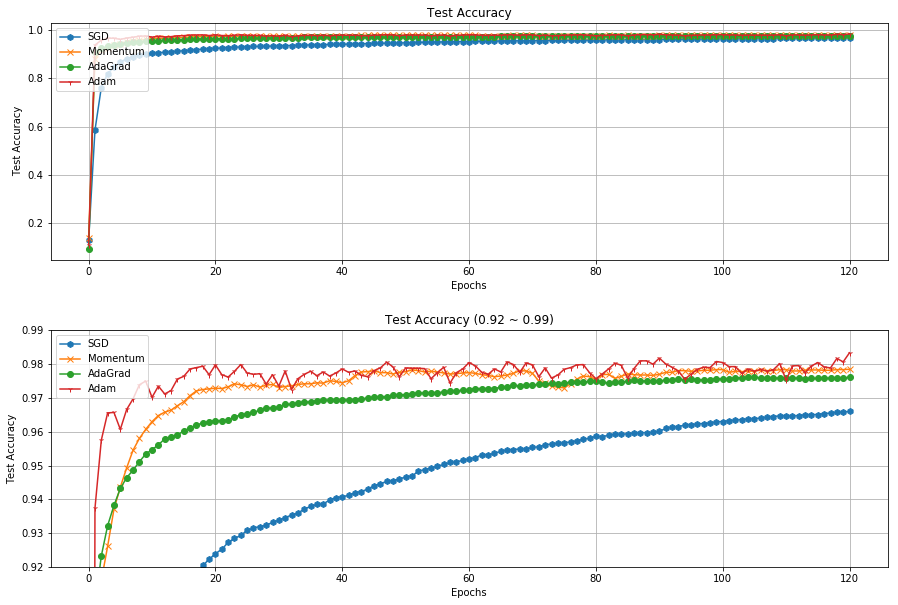

In [8]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.92, 0.99)
axarr[1].set_title('Test Accuracy (0.92 ~ 0.99)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()

In [10]:
neural_network["SGD"].draw_param_description(figsize=(20, 10))

KeyError: 'SGD'